# KMEAN

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

%matplotlib inline

#import numpy as np
#from numpy import unique
#from numpy import where

In [2]:
import warnings

# Set Seaborn theme
sns.set_theme(color_codes=True)

# Disable warnings
warnings.simplefilter("ignore")

# 1. Data Preparation

## Load the data

In [3]:
try:
    data = pd.read_csv('../../datasets/AimoScoreWeakLinks_original.csv')
    data = data.drop(columns=['Unnamed: 0', 'AimoScore'])
except IOError as e:
    print(e)

## K Mean

In [4]:
#data_left_right['WeakLinks'] = data_left_right.WeakLinks.map({'LeftArmFallForward':0, 'RightArmFallForward':1, 'RightKneeMovesOutward':1, 'RightShoulderElevation':1, 'ForwardHead':2, 'ExcessiveForwardLean':3, 'LeftAsymmetricalWeightShift':0, 'LeftShoulderElevation':0, 'LeftKneeMovesOutward':0, 'RightKneeMovesInward':1, 'RightAsymmetricalWeightShift':1})

In [5]:
data_k_2 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [6]:
clustering_kmeans = KMeans(n_clusters=2)
data_k_2['clusters'] = clustering_kmeans.fit_predict(data_k_2)

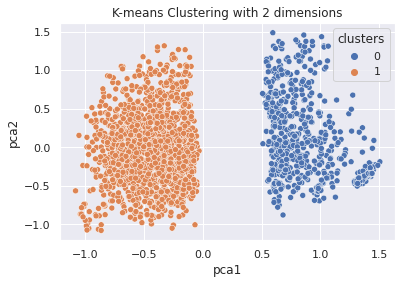

In [7]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_2)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_2['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [8]:
data_k_3 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [9]:
clustering_kmeans = KMeans(n_clusters=3)
data_k_3['clusters'] = clustering_kmeans.fit_predict(data_k_3)

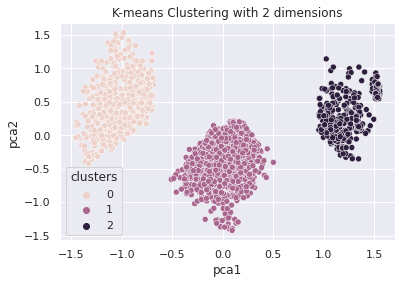

In [10]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_3)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_3['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [11]:
data_k_14 = data.drop(columns=["WeakLinks"])
y = data["WeakLinks"]

In [12]:
clustering_kmeans = KMeans(n_clusters=14)
data_k_14['clusters'] = clustering_kmeans.fit_predict(data_k_14)

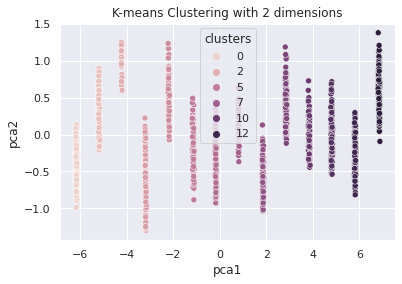

In [13]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data_k_14)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data_k_14['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [20]:
print(len(np.unique(y)))
np.unique(y)

14


array(['ExcessiveForwardLean', 'ForwardHead', 'LeftArmFallForward',
       'LeftAsymmetricalWeightShift', 'LeftHeelRises',
       'LeftKneeMovesInward', 'LeftKneeMovesOutward',
       'LeftShoulderElevation', 'RightArmFallForward',
       'RightAsymmetricalWeightShift', 'RightHeelRises',
       'RightKneeMovesInward', 'RightKneeMovesOutward',
       'RightShoulderElevation'], dtype=object)

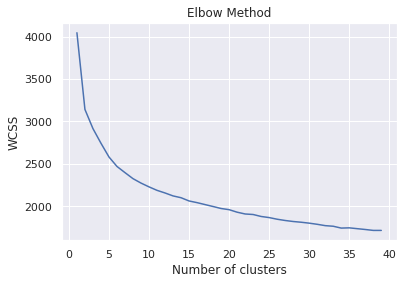

In [14]:
wcss = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_k_2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 40), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()